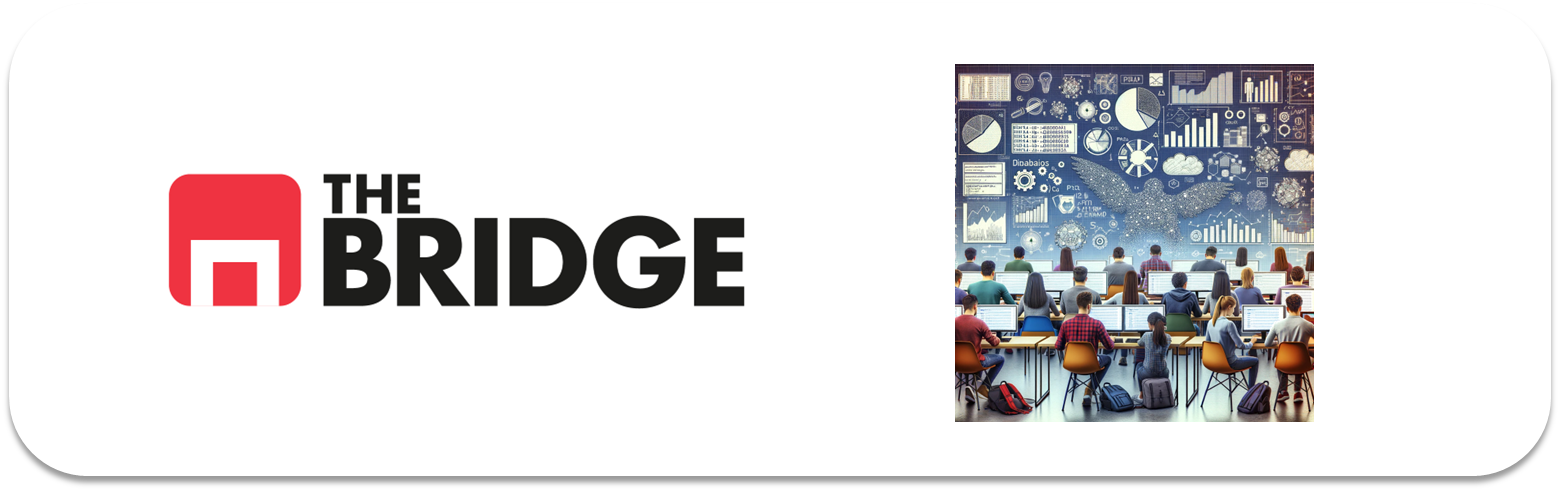

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [1]:
# Importamos el conjutno de librerías que podemos utilizar en el challenge.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
# Tengo la sensación que CHAS puede ser categórica
df.CHAS.value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [5]:
# Tengo la sensación que RAD puede ser categórica
df.RAD.value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: count, dtype: int64

Lo son. Cuidado al realizar el análisis con ambas

2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

<Axes: xlabel='MEDV', ylabel='Count'>

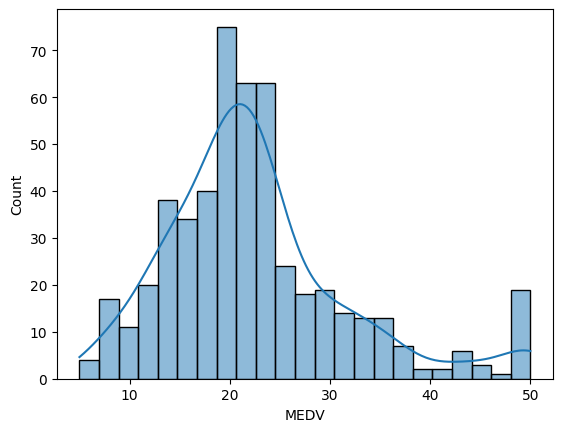

In [6]:
sns.histplot(df["MEDV"], kde= True)

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X, y de train y test

In [7]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

In [8]:
df.corr(numeric_only= True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


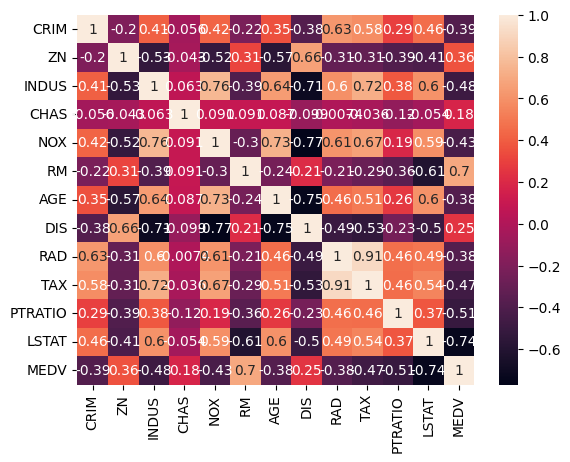

In [9]:
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show()

Lo hacemos con el df completo para ver cómo correlacionan con el target, 'MEDV'.
Nos fijamos en la útlima columna y en alguna clase escuché que tan importante son las que correlacionan bien como las que no correlacionan tan bien.

En un ejercicio visual vamos a eliminar aquellas que presentan un alta colinealidad. Pero sólo LSTAT y RM tienen un valor significativo > 0.7. No considero que presente una alta colinealidad. **Me quedo con todas**.

Además tenemos dos categóricas que se nos han colado como son CHAS y RAD

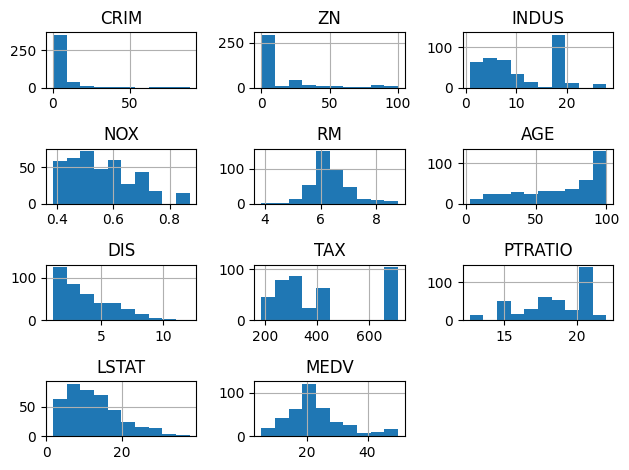

In [10]:
features_cat = ['CHAS', 'RAD']
train_set_numericas = train_set.drop(columns=features_cat)
train_set_numericas.hist()
plt.tight_layout()

6. Trata las variables para que funcionen lo mejor posible en el modelo.

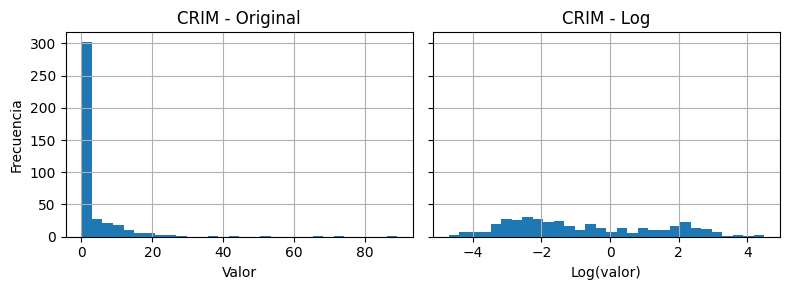

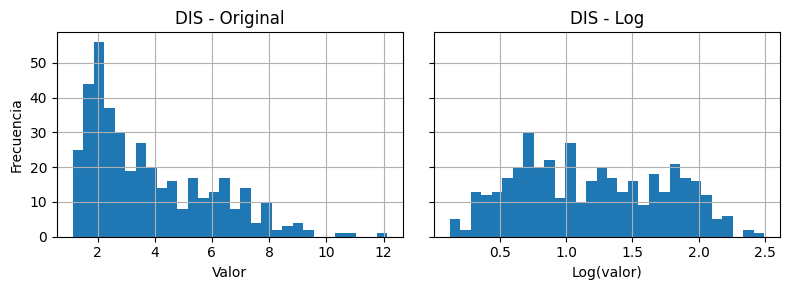

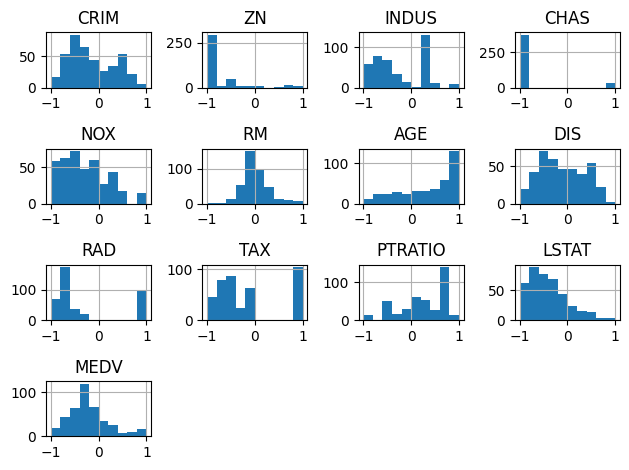

In [11]:
# Aplicamos las transformaciones necesarias. Lo hago con funciones para que me sirva luego para mi train y set

def normalizacion(df_normalized, features_num):
    """
    Normalización de las variables numéricas al rango [-1, 1].
    """
    if isinstance(features_num, str):
        features_num = [features_num]

    for feature in features_num:
        scaled_values = MinMaxScaler(feature_range=(-1, 1)).fit_transform(df_normalized[feature].values.reshape(-1, 1))
        df_normalized.loc[df_normalized.index, feature] = scaled_values.flatten()
    return df_normalized

def transf_log(df_transformed, features_num, plot=True):
    """
    Aplica transformación logarítmica a las variables especificadas y devuelve el DataFrame modificado.
    
    Parámetros:
    - df: DataFrame original.
    - features_num: Lista de columnas a transformar.
    - plot: Si True, muestra histogramas antes y después de la transformación.
    
    Retorna:
    - df: DataFrame con las columnas transformadas.
    """
    if isinstance(features_num, str):
        features_num = [features_num]

    df_transformed = df_transformed.copy()  # Para evitar modificar el original

    for feature in features_num:
        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
            df_transformed[feature].hist(ax=axs[0], bins=30)
            axs[0].set_title(f"{feature} - Original")
            axs[0].set_xlabel("Valor")
            axs[0].set_ylabel("Frecuencia")

        # Transformación logarítmica segura
        df_transformed[feature] = df_transformed[feature].apply(lambda x: np.log(x) if pd.notnull(x) and x > 0 else np.nan)

        if plot:
            df_transformed[feature].dropna().hist(ax=axs[1], bins=30)
            axs[1].set_title(f"{feature} - Log")
            axs[1].set_xlabel("Log(valor)")

            plt.tight_layout()
            plt.show()
    return df_transformed


# Priemro aplicamos una transformación logarítmica a aquellas variables que tienen una distribución sesgada (heavy tail).
features_log = ["CRIM", "DIS"]
train_set = transf_log(train_set, features_log)

# Ahora normalizamos las variables numéricas
features_num = train_set.columns
train_set = normalizacion(train_set, features_num)

train_set.hist()
plt.tight_layout()

7. Construye un modelo de regresión lineal.

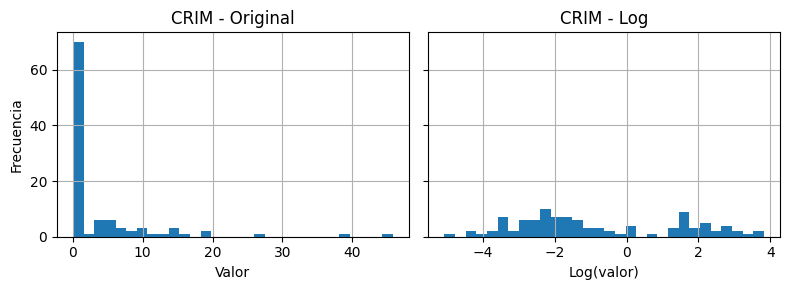

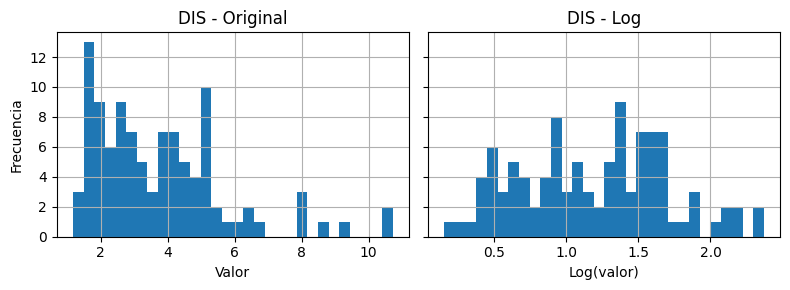

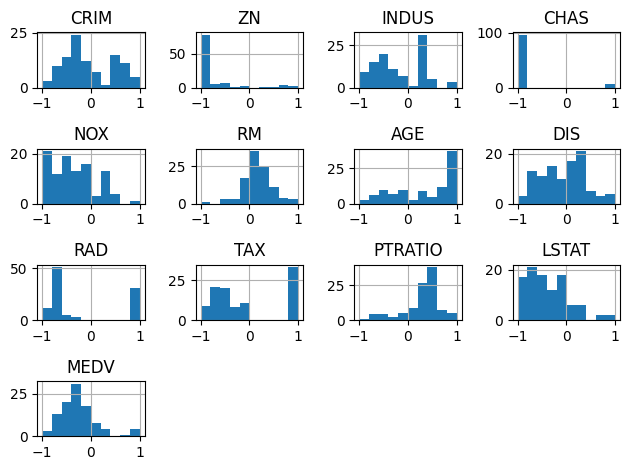

In [12]:
# Trasnformamos para nuestro test_set
features_log = ["CRIM", "DIS"]
test_set = transf_log(test_set, features_log)

# Ahora normalizamos las variables numéricas
features_num = train_set.columns
test_set = normalizacion(test_set, features_num)

test_set.hist()
plt.tight_layout()

In [13]:
# Features
X_train = train_set.drop('MEDV', axis = 1)
X_test = test_set.drop('MEDV', axis = 1)
# Target
y_train = train_set['MEDV']
y_test = test_set['MEDV']

In [14]:
X_train.info()
X_train.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
dtypes: float64(12)
memory usage: 57.2 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,-0.145396,0.467222,-1.0,-0.522223,-0.268491,0.276670,1.0
ZN,404.0,-0.768614,0.463050,-1.0,-1.000000,-1.000000,-0.600000,1.0
INDUS,404.0,-0.241107,0.510712,-1.0,-0.674815,-0.420741,0.285926,1.0
CHAS,404.0,-0.856436,0.516894,-1.0,-1.000000,-1.000000,-1.000000,1.0
NOX,404.0,-0.294304,0.484381,-1.0,-0.724280,-0.370370,0.012346,1.0
RM,404.0,-0.002281,0.288571,-1.0,-0.175310,-0.045353,0.128229,1.0
AGE,404.0,0.352347,0.576620,-1.0,-0.121524,0.540680,0.869207,1.0
DIS,404.0,-0.101876,0.460818,-1.0,-0.482388,-0.129016,0.318445,1.0
RAD,404.0,-0.273353,0.746932,-1.0,-0.739130,-0.652174,-0.043478,1.0
TAX,404.0,-0.171633,0.634247,-1.0,-0.648855,-0.454198,0.828244,1.0


In [15]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 404 entries, 477 to 102
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
404 non-null    float64
dtypes: float64(1)
memory usage: 22.5 KB


In [16]:
X_test.info()
X_test.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  LSTAT    102 non-null    float64
dtypes: float64(12)
memory usage: 14.4 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,-0.039940,0.501805,-1.0,-0.408947,-0.212244,0.479218,1.0
ZN,102.0,-0.777915,0.507016,-1.0,-1.000000,-1.000000,-1.000000,1.0
INDUS,102.0,-0.173186,0.492858,-1.0,-0.586327,-0.257331,0.293255,1.0
CHAS,102.0,-0.882353,0.472912,-1.0,-1.000000,-1.000000,-1.000000,1.0
NOX,102.0,-0.350276,0.453454,-1.0,-0.765136,-0.415449,-0.041754,1.0
RM,102.0,0.162456,0.296814,-1.0,0.032529,0.166778,0.304829,1.0
AGE,102.0,0.331515,0.616010,-1.0,-0.198294,0.460554,0.898188,1.0
DIS,102.0,-0.067242,0.462348,-1.0,-0.403265,-0.048548,0.268651,1.0
RAD,102.0,-0.190111,0.796686,-1.0,-0.739130,-0.652174,1.000000,1.0
TAX,102.0,-0.094103,0.678633,-1.0,-0.641491,-0.399618,0.827916,1.0


In [17]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 102 entries, 173 to 75
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
102 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [18]:
# Entrenamos nuestro modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

8. Analiza si lo crees conveniente los pesos y la importancia de las features.

In [19]:
coeficientes = pd.DataFrame(modelo.coef_, X_train.columns, 
columns=['importance_standarized']).sort_values('importance_standarized', ascending=False)
coeficientes

,importance_standarized
RM,0.479921
RAD,0.080302
CHAS,0.073130
ZN,0.031833
CRIM,0.006466
INDUS,-0.008430
AGE,-0.043036
TAX,-0.145017
PTRATIO,-0.174648
NOX,-0.243749


8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [20]:
pred_train = modelo.predict(X_train)
print('MAE train', mean_absolute_error(y_train, pred_train))
print('MSE train', mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pred_train)))
print('R2 train', modelo.score(X_train,y_train))

MAE train 0.15252780504520372
MSE train 0.043331261038696195
RMSE train 0.20816162239638744
R2 train 0.7474894509369068


In [21]:
predictions = modelo.predict(X_test)
print('MAE test', mean_absolute_error(y_test, predictions))
print('MSE test', mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 test', modelo.score(X_test,y_test))

MAE test 0.18188266945017503
MSE test 0.05466386692759978
RMSE test 0.23380305157888717
R2 test 0.6226352788646241


9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

In [28]:
ridgeR = Ridge(alpha = 1) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(mean_squared_error(y_train, modelo.predict(X_train)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, modelo.predict(X_test)),2))

print("Train MSE:", round(mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 0.04
Test MSE sin regularización: 0.05
Train MSE: 0.04
Test MSE: 0.05


10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?